In [1]:
import pandas as pd
from pprint import pprint
import requests
from config import ClientID,ClientSecret
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random

In [2]:
AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [3]:
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [4]:
Charts=pd.read_csv("Resources/MusicCharts.csv")
Charts
Charts.rename(columns={"year":"Year",
                      "position":"Position",
                      "artist":"Artist",
                      "song":"Song"},inplace=True)
Charts=Charts[["Year","Position","Artist","Song"]]

In [5]:
Year2000=Charts.loc[Charts["Year"]==2000]
Year2001=Charts.loc[Charts["Year"]==2001]
Year2002=Charts.loc[Charts["Year"]==2002]
Year2003=Charts.loc[Charts["Year"]==2003]
Year2004=Charts.loc[Charts["Year"]==2004]
Year2005=Charts.loc[Charts["Year"]==2005]
Year2006=Charts.loc[Charts["Year"]==2006]
Year2007=Charts.loc[Charts["Year"]==2007]
Year2008=Charts.loc[Charts["Year"]==2008]
Year2009=Charts.loc[Charts["Year"]==2009]
Year2010=Charts.loc[Charts["Year"]==2010]
Year2011=Charts.loc[Charts["Year"]==2011]
Year2012=Charts.loc[Charts["Year"]==2012]
Year2013=Charts.loc[Charts["Year"]==2013]
Year2014=Charts.loc[Charts["Year"]==2014]
Year2015=Charts.loc[Charts["Year"]==2015]
Year2016=Charts.loc[Charts["Year"]==2016]
Year2017=Charts.loc[Charts["Year"]==2017]
Year2018=Charts.loc[Charts["Year"]==2018]
Year2019=Charts.loc[Charts["Year"]==2019]
Year2020=Charts.loc[Charts["Year"]==2020]
Year2021=Charts.loc[Charts["Year"]==2021]

In [6]:
def spotifyuri(df): 
    
    tempyear=df.iloc[0,0]
    print(f"{tempyear}")
        
    for index in df.index:

        artist1=[]
        artist1=df.loc[index,"Artist"].split(" & ")

        searchterm=f'{df.loc[index,"Song"]}'

        for art in range(len(artist1)):
            searchterm=f'{searchterm} {artist1[art]}'

        searchtype="track"
        params={"q":{searchterm},
           "type":{searchtype}}
        info=requests.get(search_BASE_URL ,params=params, headers=headers).json()

        try: 
            album=info["tracks"]["items"][0]["album"]["name"]
            df.loc[index,"Album"]=album
            uri=info["tracks"]['items'][0]['uri']
            df.loc[index,"Track URI"]=uri
            urisplit=uri.split(":")
            tempuri=urisplit[2]
            df.loc[index,"Spotify URI Code"]=tempuri

        except IndexError:

            song=df.loc[index,"Song"]
            number=df.loc[index,"Position"]
            print(f"\nFailure to locate: {song} (Position:{number})\n")
            df.loc[index,"Album"]=float("nan")
            df.loc[index,"Track URI"]=float("nan")
        
        URI=df.loc[index,"Spotify URI Code"]
        analysis=requests.get(f"https://api.spotify.com/v1/audio-features/{URI}",headers=headers).json()
        
        try:
            df.loc[index,"Acousticness"]=analysis["acousticness"]
            df.loc[index,"Danceability"]=analysis["danceability"]
            df.loc[index,"Duration"]=analysis["duration_ms"]
            df.loc[index,"Energy"]=analysis["energy"]
            df.loc[index,"Instrumentalness"]=analysis["instrumentalness"]
            df.loc[index,"Liveness"]=analysis['liveness']
            df.loc[index,"Loudness"]=analysis['loudness']
            df.loc[index,"Speechiness"]=analysis['speechiness']
            df.loc[index,"Tempo"]=analysis['tempo']
            df.loc[index,"Valence"]=analysis['valence']
            
        except KeyError:
            df.loc[index,"Acousticness"]=float("nan")
            df.loc[index,"Danceability"]=float("nan")
            df.loc[index,"Duration"]=float("nan")
            df.loc[index,"Energy"]=float("nan")
            df.loc[index,"Instrumentalness"]=float("nan")
            df.loc[index,"Liveness"]=float("nan")
            df.loc[index,"Loudness"]=float("nan")
            df.loc[index,"Speechiness"]=float("nan")
            df.loc[index,"Tempo"]=float("nan")
            df.loc[index,"Valence"]=float("nan")

        
    df.dropna(how="any",inplace=True)
    
    return df

In [8]:
Year2000=spotifyuri(Year2000)
Year2001=spotifyuri(Year2001)
Year2002=spotifyuri(Year2002)
Year2003=spotifyuri(Year2003)
Year2004=spotifyuri(Year2004)
Year2005=spotifyuri(Year2005)
Year2006=spotifyuri(Year2006)
Year2007=spotifyuri(Year2007)
Year2008=spotifyuri(Year2008)
Year2009=spotifyuri(Year2009)
Year2010=spotifyuri(Year2010)
Year2011=spotifyuri(Year2011)
Year2012=spotifyuri(Year2012)
Year2013=spotifyuri(Year2013)
Year2014=spotifyuri(Year2014)
Year2015=spotifyuri(Year2015)
Year2016=spotifyuri(Year2016)
Year2017=spotifyuri(Year2017)
Year2018=spotifyuri(Year2018)
Year2019=spotifyuri(Year2019)
Year2020=spotifyuri(Year2020)
Year2021=spotifyuri(Year2021)

2000


/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



Failure to locate: I Wanna Know (Position:3)


Failure to locate: Hot Boyz (Position:56)


Failure to locate: Forgot About Dre (Position:64)



/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2001

Failure to locate: Lady Marmalade (Voulez-Vous Coucher Aver Moi Ce Soir?) (Position:10)


Failure to locate: Stutter (Position:19)

2002

Failure to locate: Move B***h (Position:65)

2003

Failure to locate: Stand Up (Position:40)


Failure to locate: Can't Hold Us Down (Position:41)

2004

Failure to locate: Dip It Low (Position:15)


Failure to locate: Stand Up (Position:99)

2005

Failure to locate: 1-2 Step (Position:8)


Failure to locate: Lose Control (Position:19)


Failure to locate: Going Crazy (Position:92)

2006

Failure to locate: I'm In Love with A Stripper (Position:62)


Failure to locate: So What (Position:69)


Failure to locate: Show Stoppers (Position:83)

2007

Failure to locate: Let It Go (Position:68)


Failure to locate: Ein Stern (... der deinen Namen tragt) (Position:89)

2008
2009
2010

Failure to locate: What Do You Want From Me? (Position:36)


Failure to locate: Getting Over You (Position:39)

2011

Failure to locate: 6 Foot 7 Foot (Position:100)

201

In [9]:
Year=[Year2000,Year2001,Year2002,Year2003,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,
      Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2017,Year2018,Year2019,Year2020,Year2021]
AllYears=pd.concat(Year)

In [10]:
Mean=AllYears.groupby(["Year"]).mean()[["Acousticness","Danceability","Duration","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]]
Mean

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Year,,,,,,,,,,
2000,0.123435,0.681928,242683.350515,0.747206,0.008970,0.146972,-5.965619,0.072770,117.642856,0.629312
2001,0.144382,0.666673,248720.408163,0.684367,0.030406,0.163820,-6.168990,0.107062,116.036388,0.588667
2002,0.141898,0.668374,246983.969697,0.725111,0.024081,0.162459,-5.757616,0.108503,117.825727,0.613366
2003,0.183151,0.666949,246221.275510,0.691653,0.026918,0.164024,-6.050276,0.131783,117.796133,0.602982
2004,0.166474,0.667031,244788.663265,0.690847,0.024930,0.169150,-5.891776,0.122318,117.137184,0.587768
2005,0.113279,0.688729,237342.958333,0.680156,0.020802,0.179084,-5.962635,0.124855,111.696406,0.563948
2006,0.111296,0.676381,239733.618557,0.701247,0.009367,0.184712,-5.730557,0.133504,118.782216,0.564316
2007,0.145983,0.659408,241158.408163,0.722367,0.009826,0.173164,-5.540704,0.109459,122.497031,0.560949
2008,0.123736,0.659600,230617.470000,0.723710,0.019754,0.174953,-5.518570,0.073401,126.608110,0.539547


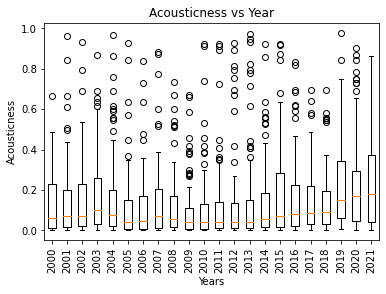

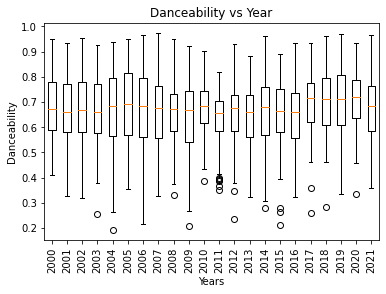

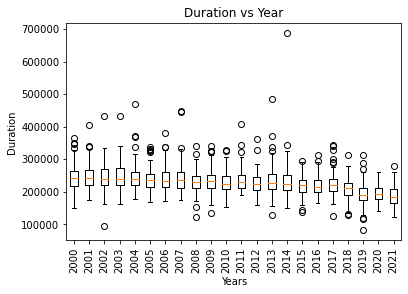

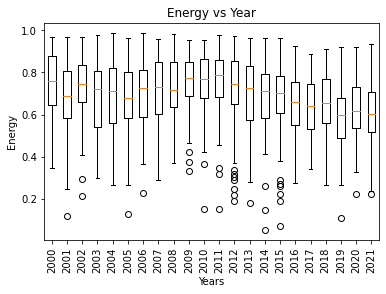

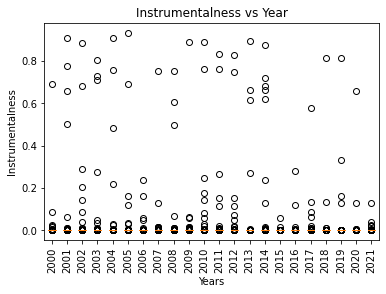

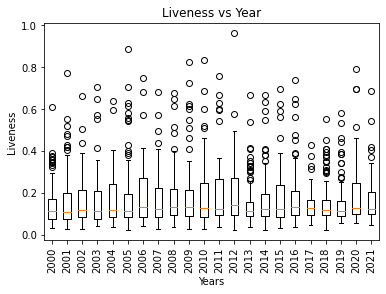

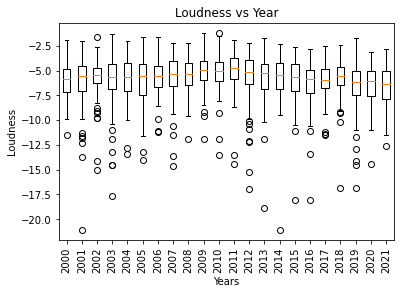

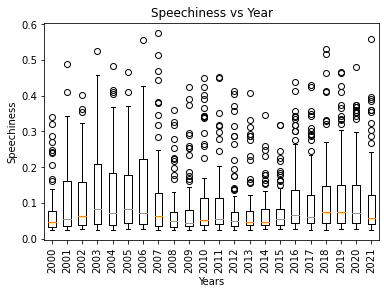

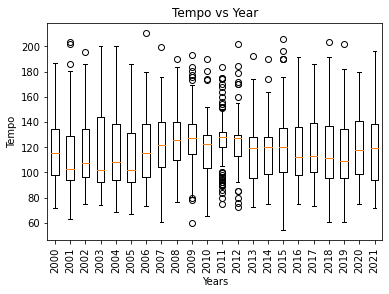

In [36]:
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    
    AcousticnessBoxplot=pd.DataFrame({"2000":Year2000.reset_index()[Audio],
                                    "2001":Year2001.reset_index()[Audio],
                                    "2002":Year2002.reset_index()[Audio],
                                    "2003":Year2003.reset_index()[Audio],
                                    "2004":Year2004.reset_index()[Audio],
                                    "2005":Year2005.reset_index()[Audio],
                                    "2006":Year2006.reset_index()[Audio],
                                    "2007":Year2007.reset_index()[Audio],
                                    "2008":Year2008.reset_index()[Audio],
                                    "2009":Year2009.reset_index()[Audio],
                                    "2010":Year2010.reset_index()[Audio],
                                    "2011":Year2011.reset_index()[Audio],
                                    "2012":Year2012.reset_index()[Audio],
                                    "2013":Year2013.reset_index()[Audio],
                                    "2014":Year2014.reset_index()[Audio],
                                    "2015":Year2015.reset_index()[Audio],
                                    "2016":Year2016.reset_index()[Audio],
                                    "2017":Year2017.reset_index()[Audio],
                                    "2018":Year2018.reset_index()[Audio],
                                    "2019":Year2019.reset_index()[Audio],
                                    "2020":Year2020.reset_index()[Audio],
                                    "2021":Year2021.reset_index()[Audio]})
    AcousticnessBoxplot.dropna(how="any",inplace=True)
    fig, ax = plt.subplots()
    ax.boxplot(AcousticnessBoxplot,labels=list(range(2000,2022)),meanline=True)
#     Mean[Audio].plot()
    ax.set_title(f"{Audio} vs Year")
    ax.set_xlabel("Years")
    ax.set_ylabel(f"{Audio}")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.savefig(f'Figures/YearbyYearBoxplots/{Audio}Boxplots.png')
    plt.close()

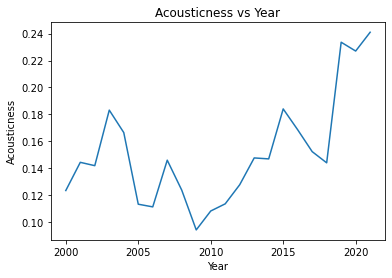

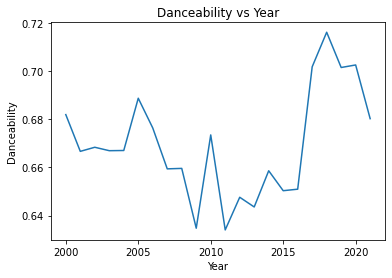

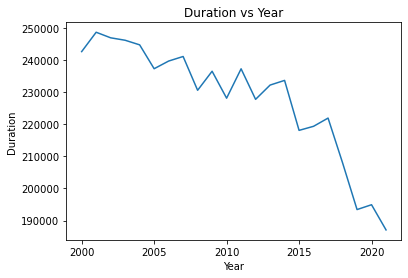

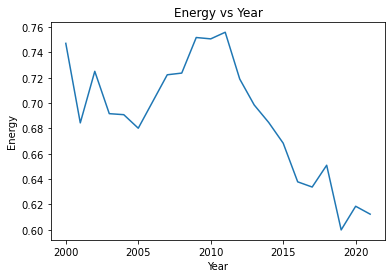

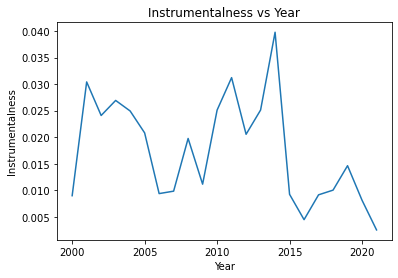

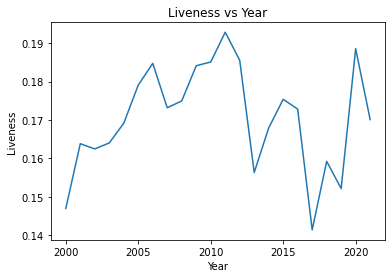

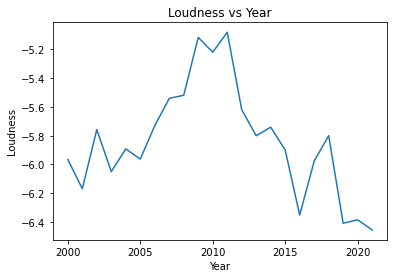

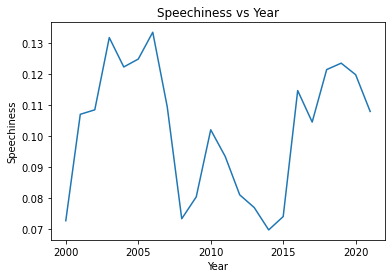

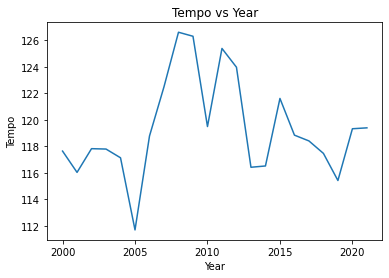

In [37]:
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    Mean[Audio].T.plot()
    plt.title(f"{Audio} vs Year")
    plt.xlabel("Year")
    plt.ylabel(f"{Audio}")
    plt.savefig(f'Figures/YearbyYearPlots/{Audio}Plots.png')
    plt.show()
    plt.close()

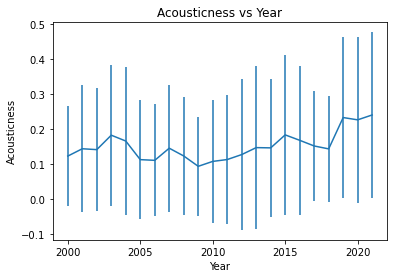

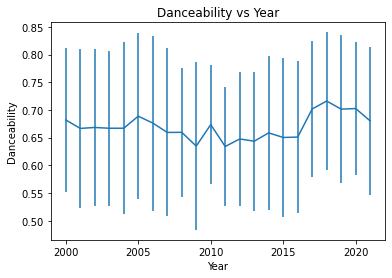

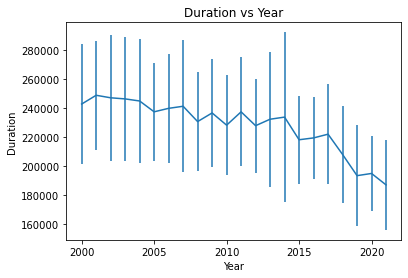

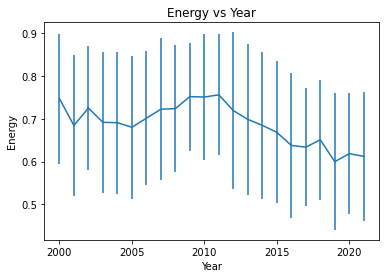

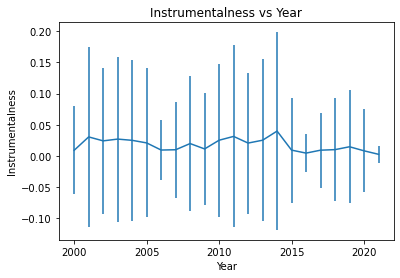

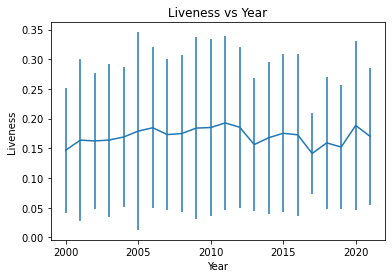

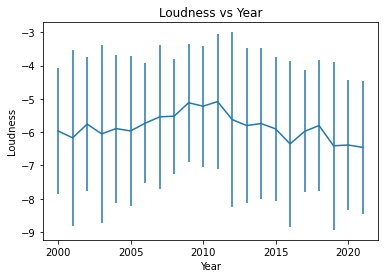

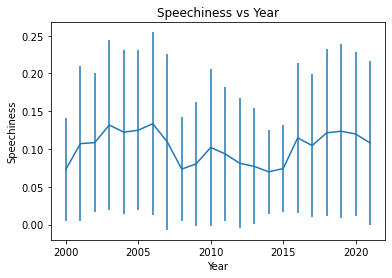

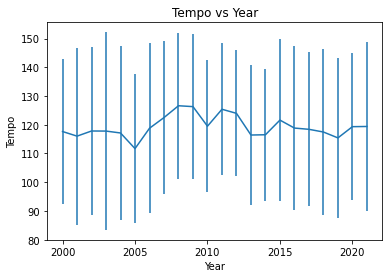

In [38]:
AudioColumns=AllYears.columns[7:16]
mean_std=AllYears[["Year","Duration"]].groupby("Year").agg(["mean","std"])

for Audio in AudioColumns:
    mean_std=AllYears[["Year",Audio]].groupby("Year").agg(["mean","std"])
    plt.errorbar(mean_std.index,mean_std[Audio]["mean"],yerr=mean_std[Audio]["std"])
    plt.title(f"{Audio} vs Year")
    plt.xlabel("Year")
    plt.ylabel(f"{Audio}")
    plt.savefig(f'Figures/YearbyYearErrorbar/{Audio}ErrorBar.png')
    plt.show()
    plt.close()

In [58]:
GroupedData=AllYears[['Year','Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo']].groupby("Year").agg(["mean","std"])

AudioColumns=['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo']

for Audio in AudioColumns:
    tempdf=GroupedData[Audio]
    tempdf.to_csv(f"Figures/ErrorBarData/{Audio}Grouped.csv",header=True,index=True)